In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
from analysis_tools_cython import *
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [3]:
test = [6.69896182e-04, 1.48646445e+03, 2.46714357e-01, 4.31037294e-02]
event = [1484.57491174, 1484.5957449,  1484.61657806, 1484.63741122, 1484.65824438,
 1484.67907754, 1484.6999107,  1484.72074386, 1484.74157702, 1484.76241018,
 1484.78324334, 1484.8040765,  1484.82490965, 1484.84574281, 1484.86657597,
 1484.88740912, 1484.90824228, 1484.92907544, 1484.94990859, 1484.97074175,
 1484.9915749 , 1485.01240805, 1485.03324121, 1485.05407436, 1485.07490751,
 1485.09574067, 1485.11657382, 1485.13740697, 1485.15824012, 1485.17907327,
 1485.19990642, 1485.22073957, 1485.24157272, 1485.26240587, 1485.28323902,
 1485.30407217, 1485.32490532, 1485.34573846, 1485.36657161, 1485.38740476,
 1485.4082379 , 1485.42907105, 1485.44990419, 1485.47073734, 1485.49157048,
 1485.51240363, 1485.53323677, 1485.55406991, 1485.57490306, 1485.5957362,
 1485.61656934, 1485.63740248, 1485.65823562, 1485.67906877, 1485.69990191,
 1485.72073505, 1485.74156819, 1485.76240132, 1485.78323446, 1485.8040676,
 1485.82490074, 1485.84573388, 1485.86656701, 1485.88740015, 1485.90823329,
 1485.92906642, 1485.94989956, 1485.97073269, 1485.99156583, 1486.01239896,
 1486.03323209, 1486.05406523, 1486.07489836, 1486.09573149, 1486.11656462,
 1486.13739776, 1486.15823089, 1486.17906402, 1486.19989715, 1486.22073028,
 1486.24156341, 1486.26239654, 1486.28322966 ,1486.30406279, 1486.32489592,
 1486.34572905, 1486.36656217, 1486.3873953 , 1486.40822842, 1486.42906155,
 1486.44989467, 1486.4707278 , 1486.49156092, 1486.51239405, 1486.53322717,
 1486.55406029, 1486.57489341, 1486.59572654, 1486.61655966, 1486.63739278,
 1486.6582259 , 1486.67905902, 1486.69989214, 1486.72072526, 1486.74155837,
 1486.76239149, 1486.78322461, 1486.80405773, 1486.82489084, 1486.84572396,
 1486.86655708, 1486.88739019, 1486.90822331, 1486.92905642, 1486.94988953,
 1486.97072265, 1486.99155576, 1487.01238887, 1487.03322198, 1487.0540551,
 1487.07488821, 1487.09572132, 1487.11655443, 1487.13738754, 1487.15822065,
 1487.17905375, 1487.19988686, 1487.22071997, 1487.24155308, 1487.26238618,
 1487.28321929, 1487.30405239, 1487.3248855 , 1487.3457186 , 1487.36655171,
 1487.38738481, 1487.40821792, 1487.42905102, 1487.44988412, 1487.47071722,
 1487.49155032, 1487.51238342, 1487.53321663, 1487.55404962, 1487.57488272,
 1487.59571582, 1487.61654892, 1487.63738202 ,1487.65821511, 1487.67904821,
 1487.6998813  ,1487.7207144 , 1487.74154749 ,1487.76238059, 1487.78321368,
 1487.80404678, 1487.82487987, 1487.84571296, 1487.86654605, 1487.88737914,
 1487.90821223, 1487.92904532] 
# t,A,t0,sigma,tail
# 

t = range(len(event))

In [4]:
y = -comet_curve(event, 1.86164653e-03, 1.48640353e+03, 3.02715600e-01, 3.40346173e-01)


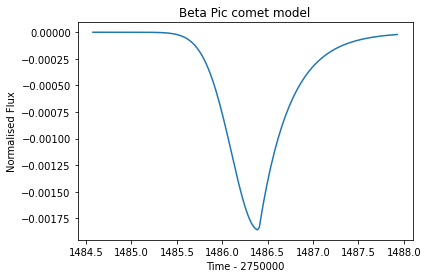

In [5]:
plt.plot(event,y)
plt.title("Beta Pic comet model")
plt.xlabel("Time - 2750000")
plt.ylabel("Normalised Flux")
plt.show()


---

## Beta Pic S6

In [6]:
import lightkurve as lk

In [7]:
data = lk.search_lightcurve("Beta Pictoris")[12].download()

In [8]:
time2 = data.time.value[700:900]
flux2 = data.flux.value[700:900]

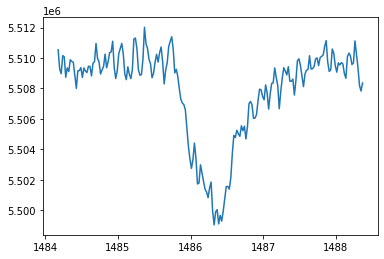

In [9]:
plt.plot(time2,flux2)

In [10]:
a, b, c = np.histogram2d(time2,flux2, bins=10)

In [12]:
np.mean(skew(a.T))

1.4337594309551487

In [35]:
skew(a.T)


array([ 2.66666667,  2.66666667,  2.66666667,  1.41431218, -0.23611111,
        1.63781664,  0.68173272,  2.25476286,  2.66666667,  2.66666667])

---
## Noiseless comet

In [13]:
from scipy.stats import skew

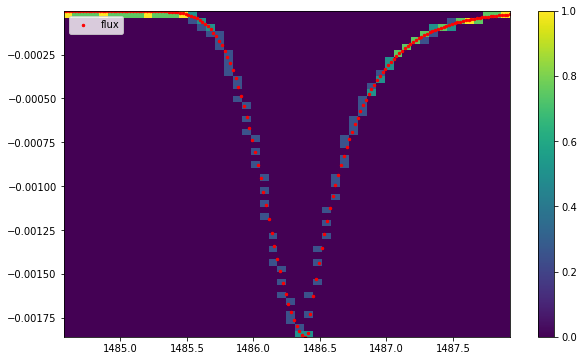

In [31]:
plt.figure(figsize=(10,6))
plt.hist2d(event,y,bins=50)
plt.scatter(event, y, color='r',s=6,label='flux')
plt.legend()
plt.colorbar()
plt.show()

In [15]:
np.mean(a)

2.0

In [16]:
np.median(a)

0.0

In [30]:
3*(np.mean(a) - np.median(a))/np.nanstd(a)

1.2508668395294944

In [18]:
skew(a)

array([ 2.66666667,  1.5       ,  2.11048163,  2.49125658,  1.25881449,
        2.34857162,  2.21326715, -0.09889181, -0.03606411,  0.95992373])

In [19]:
a, b, c = np.histogram2d(event,y, bins=10)

In [20]:
a

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  5.,  8.],
       [ 0.,  2.,  3.,  2.,  3.,  2.,  3.,  1.,  0.,  0.],
       [ 8.,  3.,  2.,  3.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3.,  3.,  5.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 11.,  3.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.]])

In [34]:
a.T

array([[ 0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3.,  0.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2.,  0.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3.,  0.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3.,  1.,  0.,  5.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  5.,  0.,  0.,  0., 11.,  0.,  0.],
       [17., 16., 16.,  8.,  0.,  0.,  0.,  3., 16., 17.]])

In [21]:
skew(a.T)

array([ 2.66666667,  2.66666667,  2.66666667,  1.41431218, -0.23611111,
        1.63781664,  0.68173272,  2.25476286,  2.66666667,  2.66666667])

In [22]:
b

array([1484.57491174, 1484.9103251 , 1485.24573846, 1485.58115181,
       1485.91656517, 1486.25197853, 1486.58739189, 1486.92280525,
       1487.2582186 , 1487.59363196, 1487.92904532])

In [23]:
c

array([-1.85900405e-03, -1.67310365e-03, -1.48720325e-03, -1.30130284e-03,
       -1.11540244e-03, -9.29502038e-04, -7.43601635e-04, -5.57701232e-04,
       -3.71800829e-04, -1.85900425e-04, -2.21894379e-11])

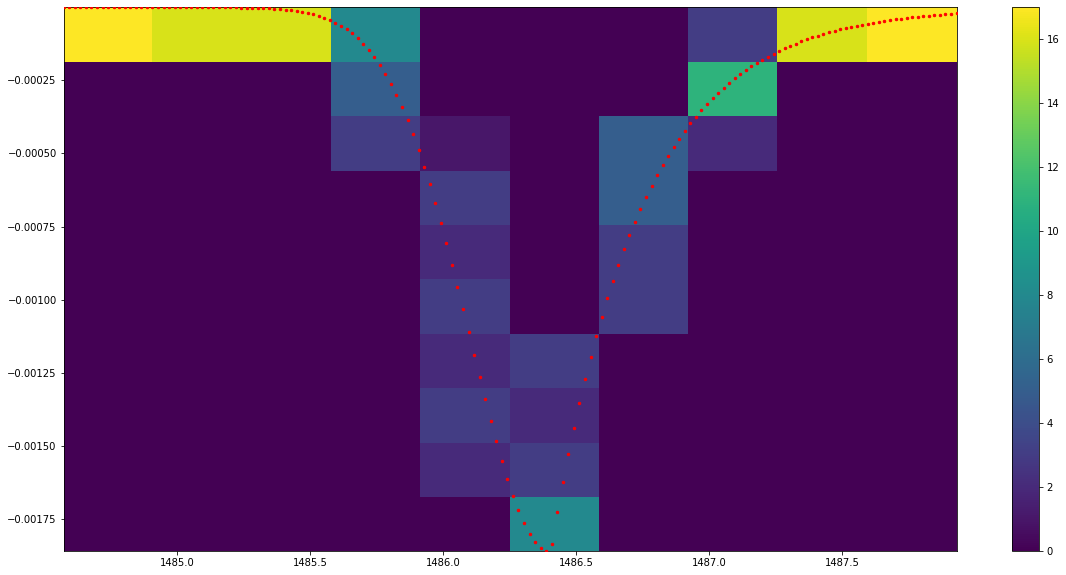

In [24]:
plt.figure(figsize=(20,10))
X, Y = np.meshgrid(b,c)

plt.scatter(event, y, color='r',s=6,label='flux',zorder=3)

plt.pcolormesh(X, Y, a.T)
plt.colorbar()

---
## WASP-100


In [25]:
import lightkurve as lk

In [26]:
lc = lk.search_lightcurve("WASP-100")[1].download()

In [27]:
lc.time.value

array([1325.34474937, 1325.36558298, 1325.3864166 , ..., 1353.11589919,
       1353.13673265, 1353.15756611])

In [28]:
time = lc.time.value[190:215]
flux = lc.flux.value[190:215]

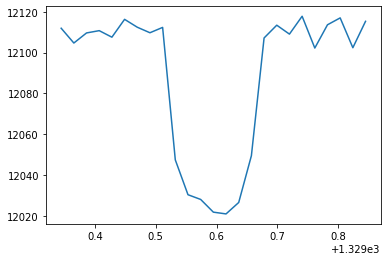

In [29]:
plt.plot(time,flux)

In [168]:
test, test2, test3 = np.histogram2d(time,flux, bins=10)

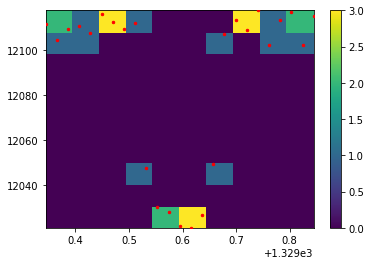

In [169]:
x, y = np.meshgrid(test2,test3)

plt.scatter(time,flux, color='r',s=6,label='flux',zorder=3)

plt.pcolormesh(x,y, test.T)
plt.colorbar()

In [170]:
np.mean(skew(test.T))

2.05062557394402

In [172]:
skew(test.T)

array([1.91979454, 1.5       , 2.66666667, 1.5       , 2.66666667,
       2.66666667, 1.5       , 2.66666667, 1.5       , 1.91979454])

In [6]:
from scipy import integrate

In [7]:
integral = integrate.trapezoid(y,event)
integral

-0.0013327296107989001

In [8]:
new = -comet_curve(event, 1.86164653e-03, 1.48640353e+03, np.sqrt(2)*3.02715600e-01, np.sqrt(2)*(3.40346173e-01))

In [9]:
integral_two = integrate.trapezoid(new*2,event)
integral_two

-0.003714449554064946

In [10]:
integral_two/integral

2.787099141466762

In [19]:
z = 0.5 * y

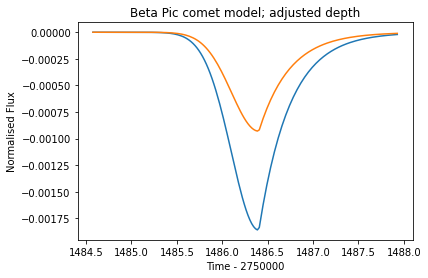

In [21]:
plt.plot(event,y)
plt.plot(event,z)
#plt.plot(event,new*2)
plt.title("Beta Pic comet model; adjusted depth")
plt.xlabel("Time - 2750000")
plt.ylabel("Normalised Flux")
plt.show()

In [101]:
y.min()/new.min()

0.9992900332974504

In [12]:
import random

In [ ]:
np.random.uniform(0,2,size=1).values

In [7]:
import numpy as np

In [8]:
arr = np.zeros(1000)

In [9]:
arr[150:150+len(y)] = y

In [10]:
noise = np.random.normal(0, 0.001, arr.shape)

In [11]:
test = arr + noise

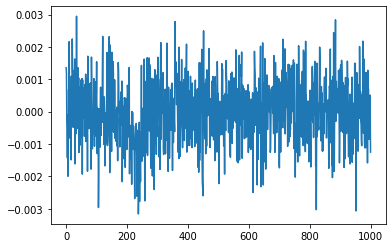

In [12]:
plt.plot(test)

---

In [13]:
#def make_injections(number, betapic=True,array_len,save=True):
    # number: how many transits to make
    # Betapic: model based off betapic's transit. If False, insert params.
    # array_len: how long to make lightcurve
    # save: save lightcurves in directory

In [14]:
import random
from tqdm import tqdm

In [15]:
for i in tqdm(range(0,100)):
    y = -comet_curve(event, 1.86164653e-03, 1.48640353e+03, 3.02715600e-01, 3.40346173e-01)
    arr = np.zeros(1000) #length of lightcurve. also acts as quality flag of zeros
    rand = random.choice(list(enumerate(arr)))[0]
    try:
        arr[rand:rand+len(y)] = y
    except:
        continue
    #if rand > (len(arr) - len(y)):
    #    rand = rand - 400
    #    arr[(rand):(rand)+len(y)] = y
    #else:
    #    arr[rand:rand+len(y)] = y
    ##except:
    ##    arr[random.choice(list(enumerate(arr)))[0] - 100:random.choice(list(enumerate(arr)))[0]+len(y)] = y
    noise_range = np.arange(0.0001,0.003,0.0001)
    noise = np.random.normal(0, np.random.choice(noise_range), arr.shape)
    flux = arr + noise
    t = np.arange(0,len(arr),1)
    np.savez(f'injection_testing/no_noise_betapic/faketransit_{i}',time=t,flux=arr,quality=arr)    

100%|██████████| 100/100 [00:01<00:00, 68.23it/s]


---
## Injection testing: example

In [16]:
test= np.load(f'injection_testing/for_testing/faketransit_{np.random.choice(np.arange(0,10000,1))}.npz')
test.zip

<zipfile.ZipFile file=<_io.BufferedReader name='injection_testing/for_testing/faketransit_704.npz'> mode='r'>

In [17]:
table = Table([test['time'],test['flux'],test['quality']],names=test.files)
table

<Table length=1000>
 time           flux          quality
int64         float64         float64
----- ----------------------- -------
    0   -7.85147787343037e-05     0.0
    1   0.0006914532310077266     0.0
    2  0.00023335913800484685     0.0
    3   0.0006543536456155253     0.0
    4  -0.0003176050761893841     0.0
    5   0.0007647278846768128     0.0
    6   0.0005083278716428905     0.0
    7   0.0004708219817648661     0.0
    8  -0.0013212491132676017     0.0
    9    0.001119979785040936     0.0
  ...                     ...     ...
  990   0.0009399679321795211     0.0
  991   0.0005163337255997052     0.0
  992   0.0007044887557216766     0.0
  993 -4.8745050365894894e-05     0.0
  994   0.0009495513576657529     0.0
  995  -0.0008911594708911808     0.0
  996   0.0003265515289380958     0.0
  997 -0.00038972486731125443     0.0
  998   -0.001060520998920348     0.0
  999   0.0009526117073245849     0.0

In [18]:
t = table['time']
flux = table['flux']
quality = table['quality']

In [19]:
timestep = calculate_timestep(table)
factor = (1/48)/timestep
T = test_statistic_array(table['flux'].value,60)
Ts = nonzero(T).std()

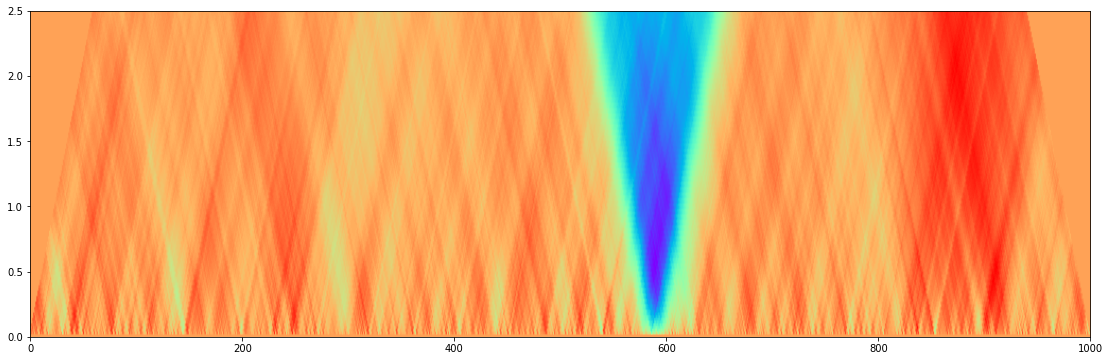

In [20]:
plt.figure(figsize=(19,6))
plt.imshow(T,origin='bottom',extent=(0,1000) + (0, 2.5),aspect="auto",cmap="rainbow")

In [21]:
m, n = np.unravel_index(
        T.argmin(), T.shape
        )  # T.argmin(): location of  T.shape: 2D array with x,y points in that dimension
minT = T[m, n]
minT_time = t[n]
minT_duration = m
Tm_start = n-math.floor((m-1)/2)
Tm_end = Tm_start + m
Tm_depth = flux[Tm_start:Tm_end].mean() 

In [22]:
print("Maximum transit chance:")
print("   Time =", round(minT_time, 2), "days.")
print("   Duration =", round(minT_duration, 2), "")
print("   T =", round(minT, 1))
print("   T/sigma =", round(minT / Ts, 1))

Maximum transit chance:
   Time = 588 days.
   Duration = 27 
   T = -12.6
   T/sigma = -5.0


In [23]:
t2 = t[n - 3 * m : n + 3 * m]
x2 = flux[n - 3 * m : n + 3 * m]
q2 = quality[
n - 3 * m : n + 3 * m
]  # quality points from three transit widths to other edge of three transit widths.
background = (sum(x2[: 1 * m]) + sum(x2[5 * m :])) / (2 * m)
x2 -= background
paramsgauss = single_gaussian_curve_fit(t2, -x2)
y2 = -gauss(t2, *paramsgauss)
paramscomet = comet_curve_fit(t2, -x2)
w2 = -comet_curve(t2, *paramscomet)
scores = [score_fit(x2, fit) for fit in [y2, w2]]
print("Asym score:", round(scores[0] / scores[1], 4))

Asym score: 1.034


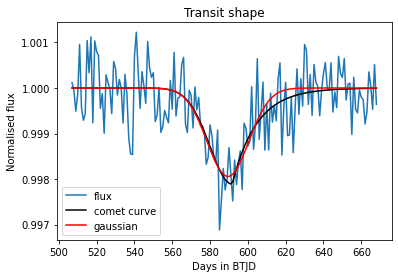

In [24]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

try:
    ax2.plot(t2, x2 + 1, label="flux")
    ax2.plot(t2, w2 + 1, label="comet curve", color="k")
    ax2.plot(t2, y2 + 1, label="gaussian", color="r")
    ax2.legend()
    ax2.set_title("Transit shape")
    ax2.set_xlabel("Days in BTJD")
    ax2.set_ylabel("Normalised flux")
except:
    pass

----
## Multi-test run (no detrending)

file number 40
Asymmetry score:  1.0011


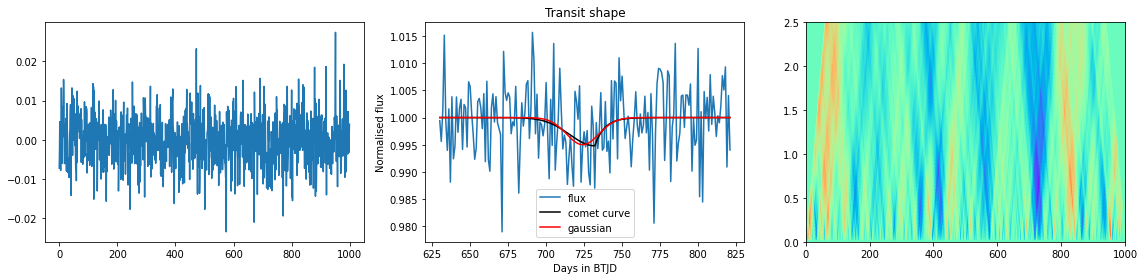

file number 60
Asymmetry score:  1.0025


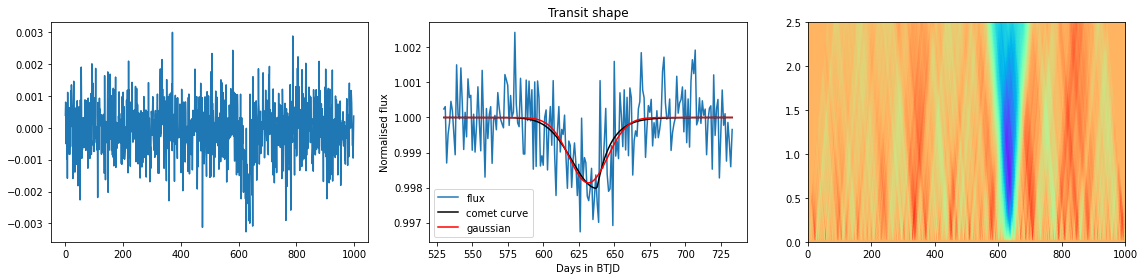

file number 81
Asymmetry score:  1.0004


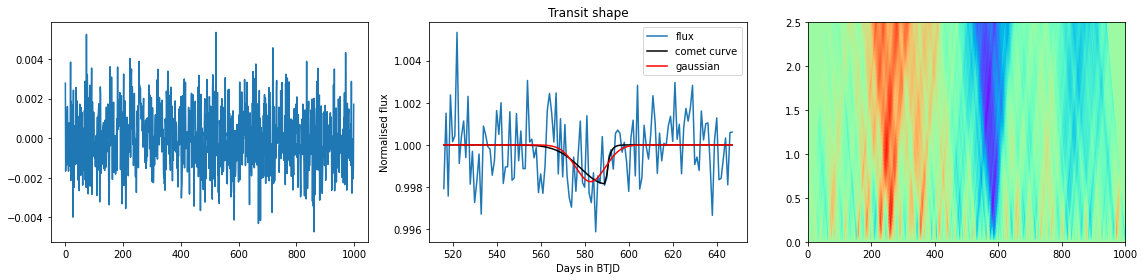

file number 28
Asymmetry score:  1.086


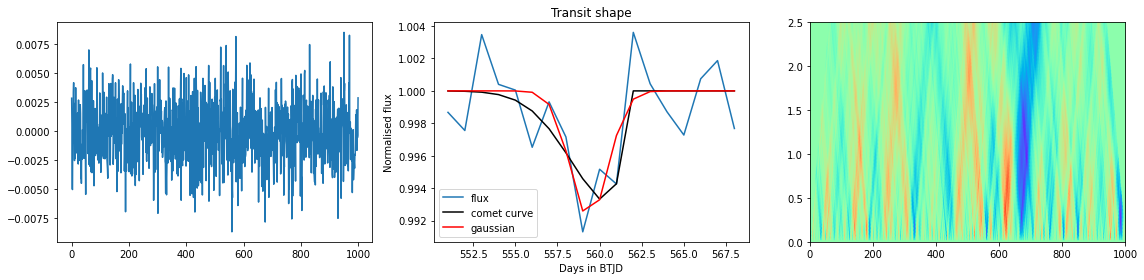

file number 5
Asymmetry score:  1.0015


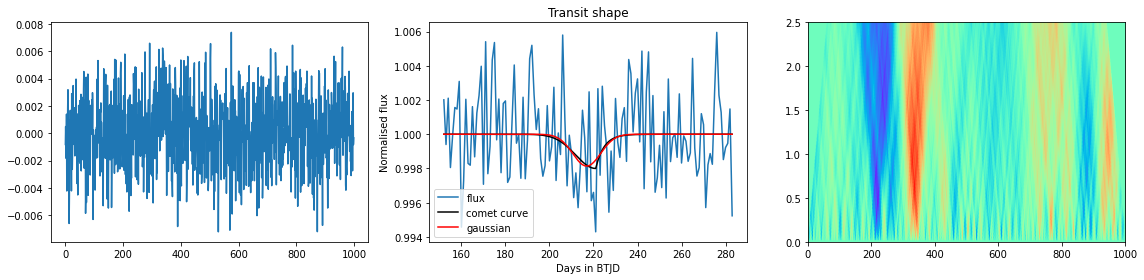

file number 77
Asymmetry score:  0.9876


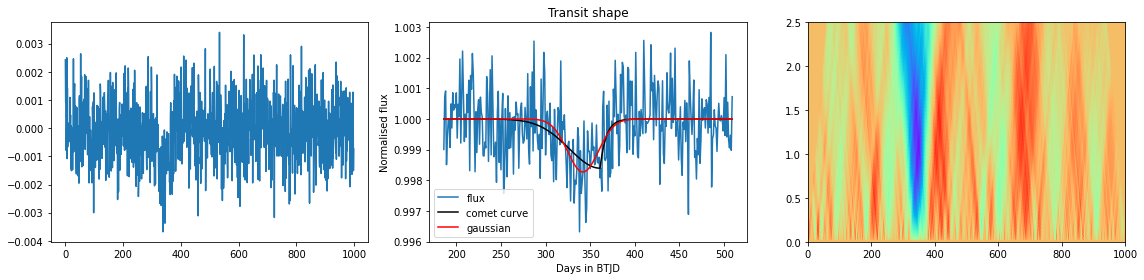

file number 30
Asymmetry score:  1.0364


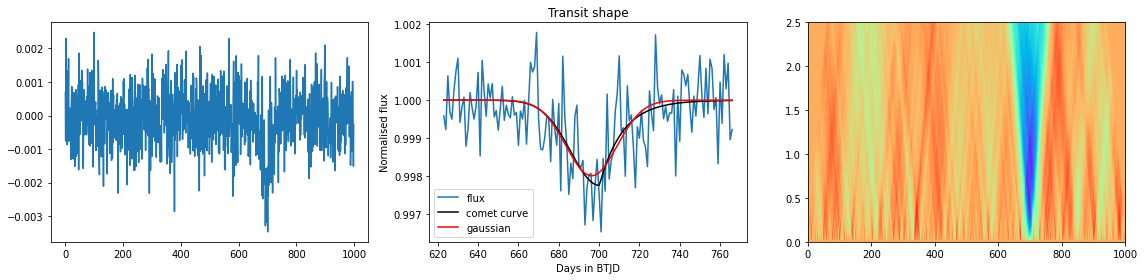

file number 58
Asymmetry score:  1.0078


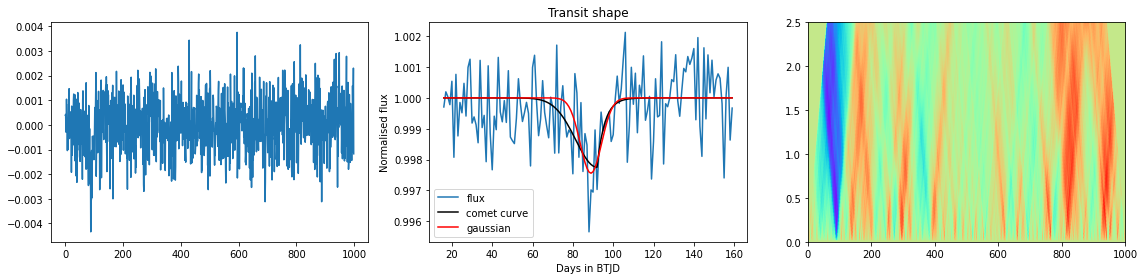

file number 8
Asymmetry score:  1.0186


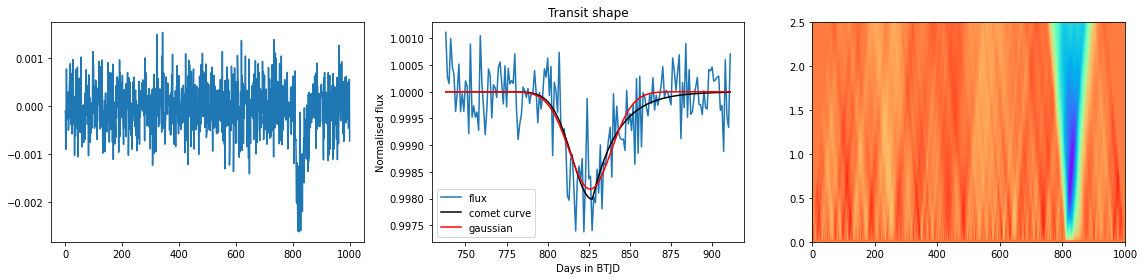

file number 41
Asymmetry score:  0.9926


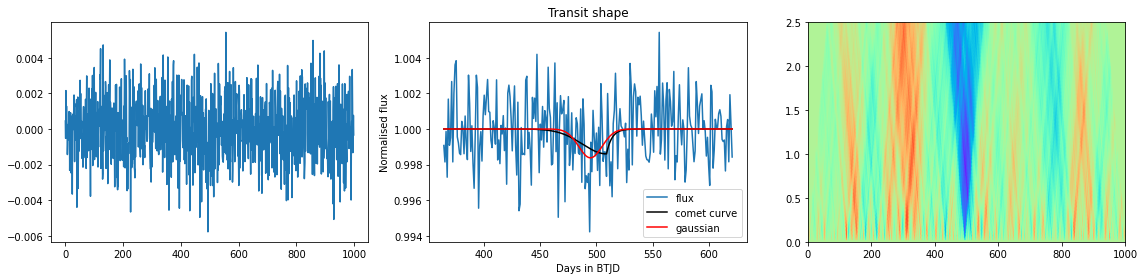

file number 6
Asymmetry score:  1.0089


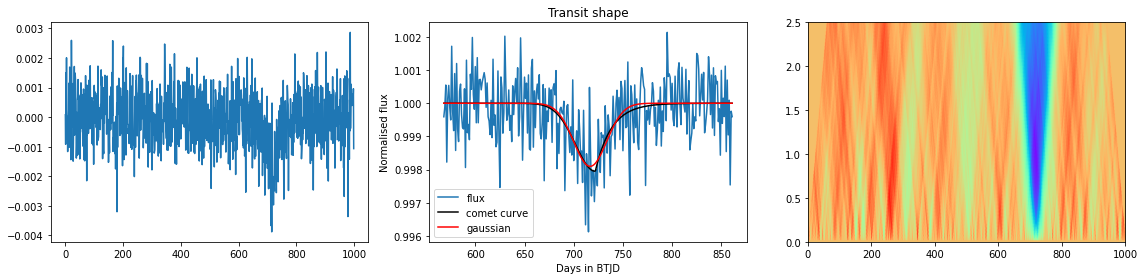

file number 24
error: attempt to get argmax of an empty sequence. moving to next one...
file number 61
Asymmetry score:  1.0048


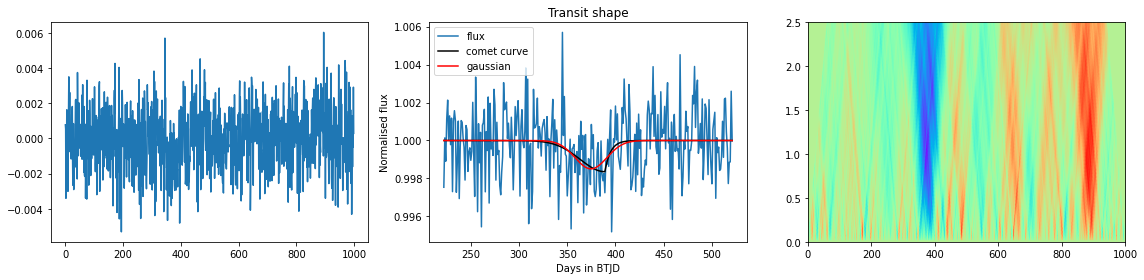

file number 69
Asymmetry score:  1.0002


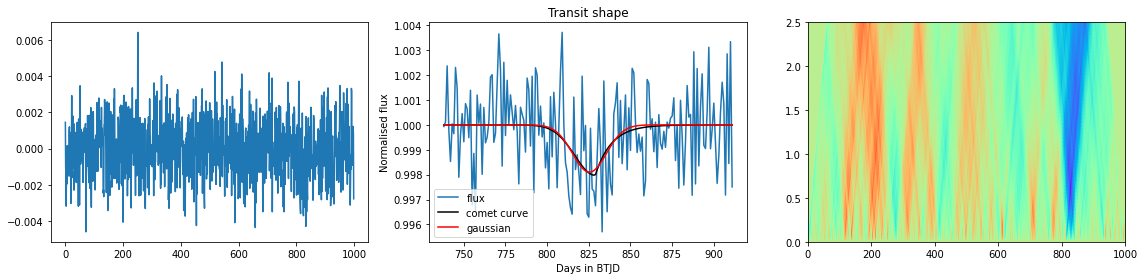

file number 55
Asymmetry score:  0.9981


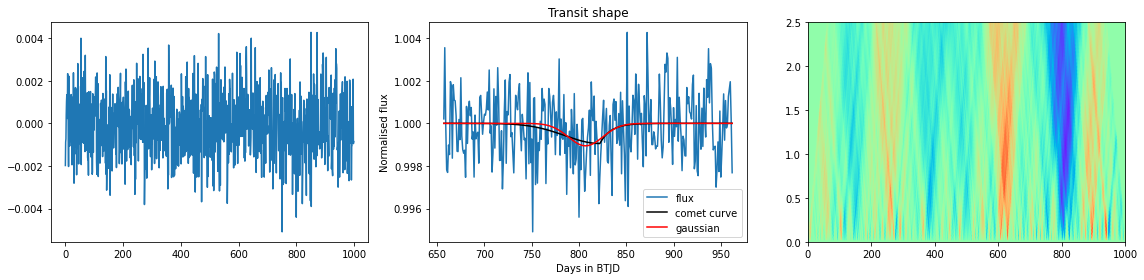

file number 95
Asymmetry score:  1.0042


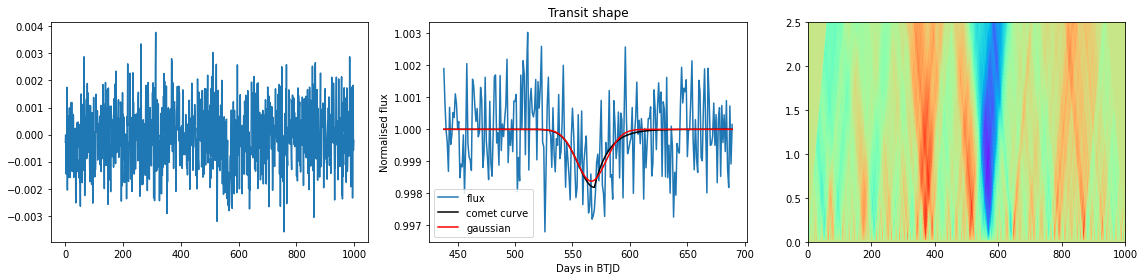

file number 78
Asymmetry score:  1.0054


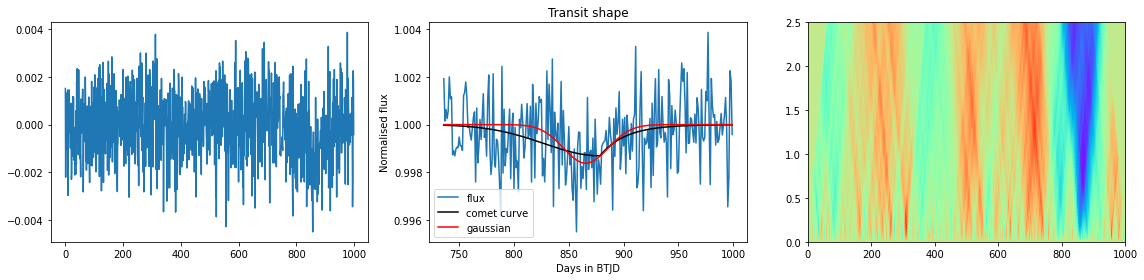

file number 9
Asymmetry score:  1.0126


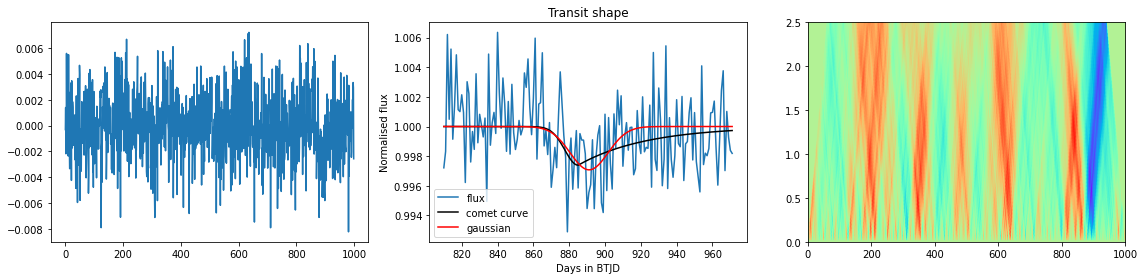

file number 50
Asymmetry score:  0.9997


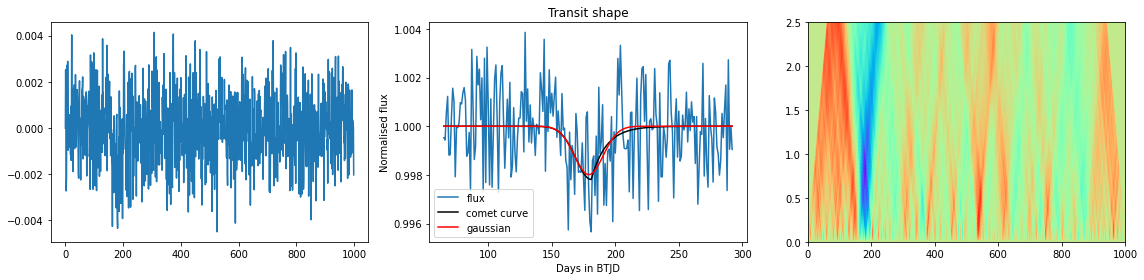

file number 98
Asymmetry score:  1.0056


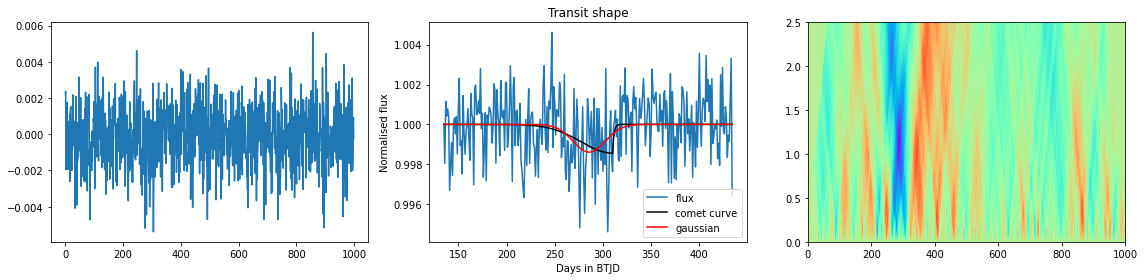

file number 22
Asymmetry score:  1.0024


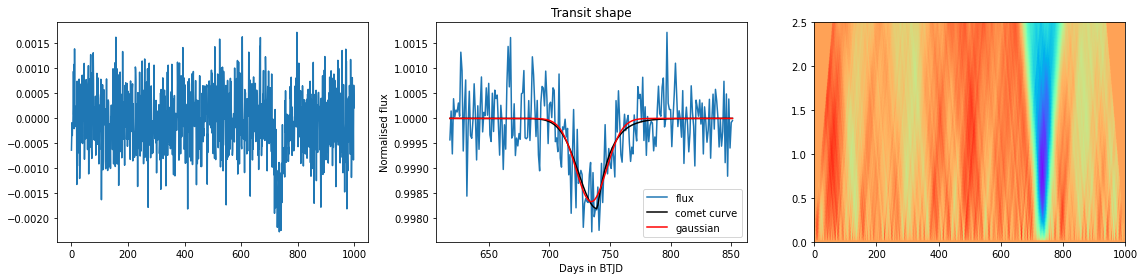

file number 8
Asymmetry score:  1.0186


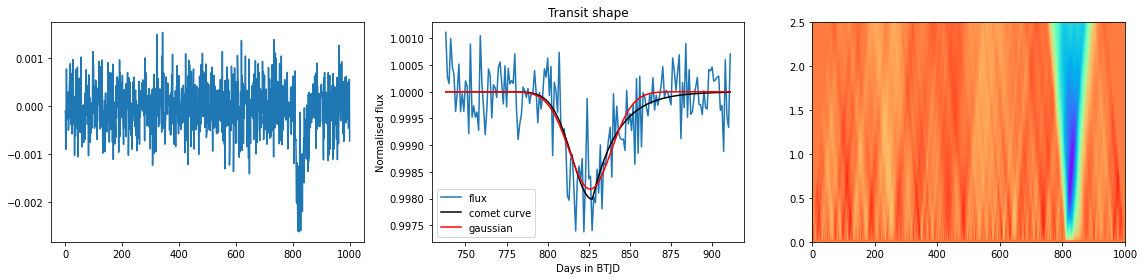

file number 69
Asymmetry score:  1.0002


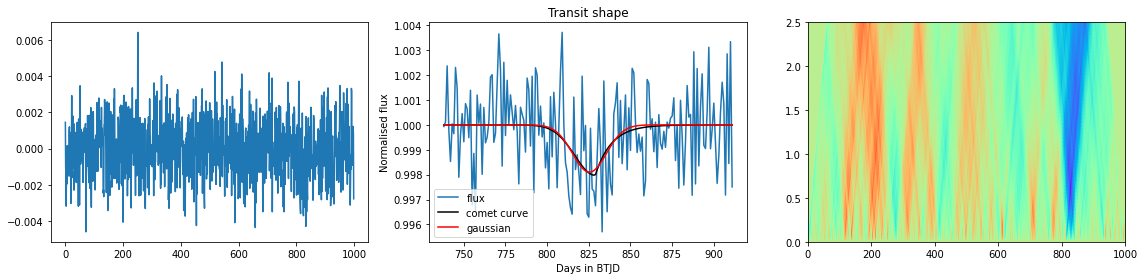

file number 51
Asymmetry score:  1.0173


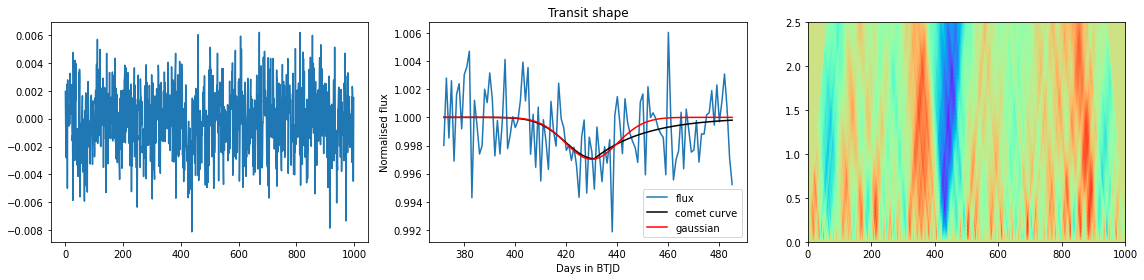

file number 42
Asymmetry score:  1.0022


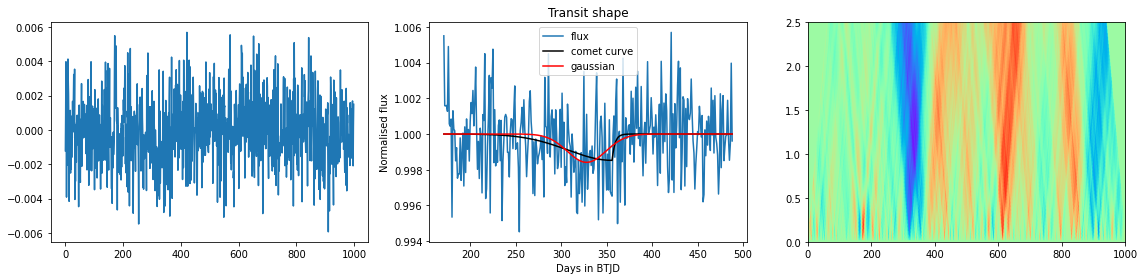

file number 4
Asymmetry score:  1.0023


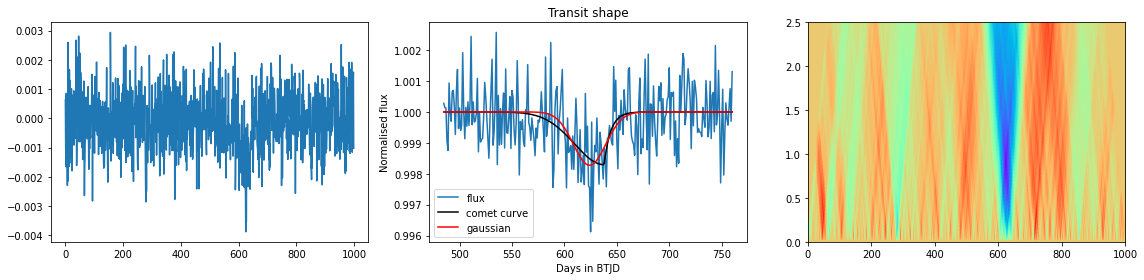

file number 84
Asymmetry score:  0.9997


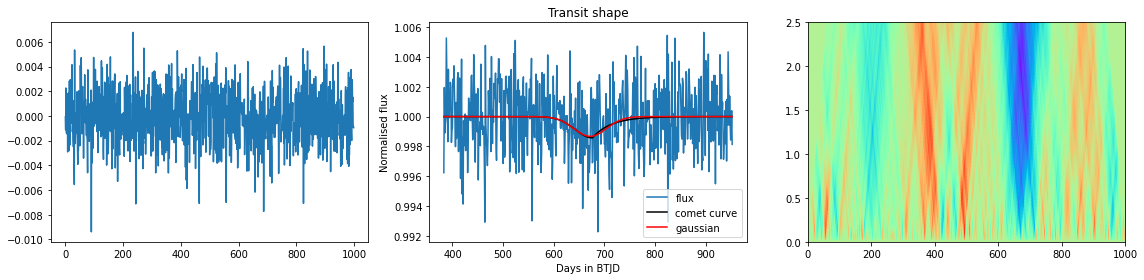

file number 19
Asymmetry score:  1.005


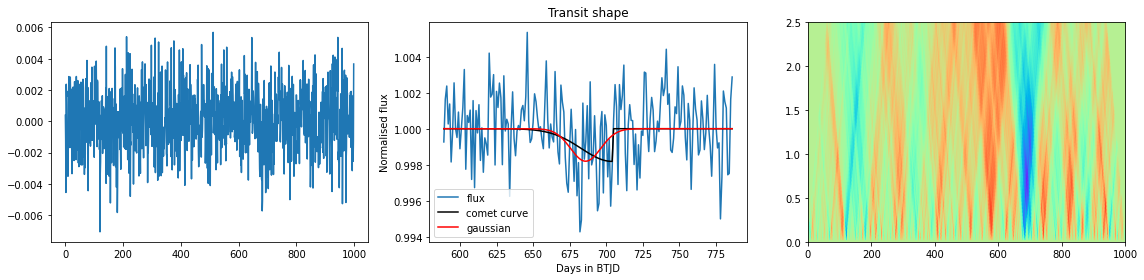

file number 76
error: attempt to get argmax of an empty sequence. moving to next one...
file number 1
Asymmetry score:  1.012


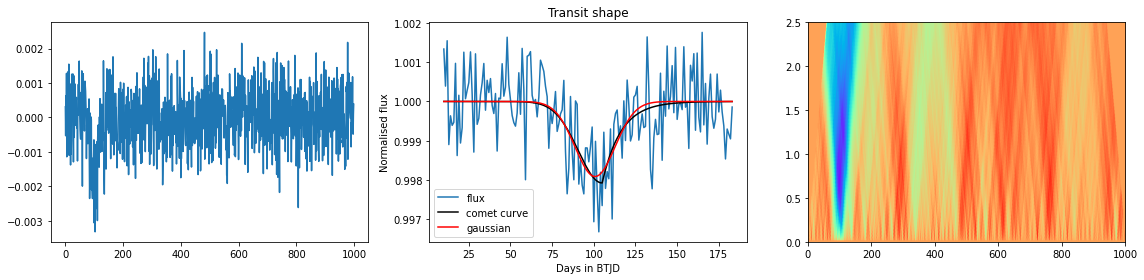

file number 84
Asymmetry score:  0.9997


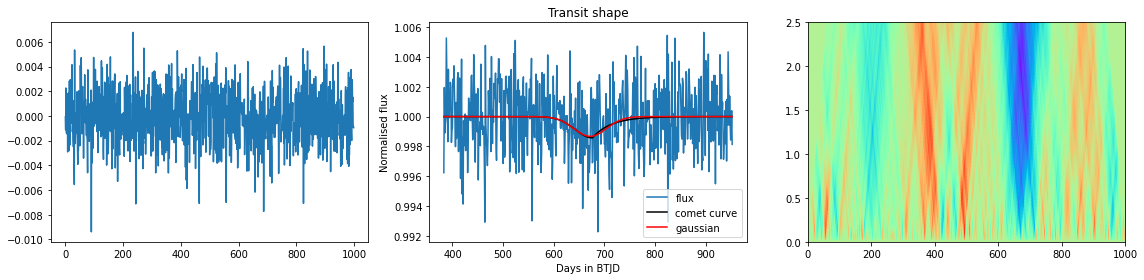

file number 28
Asymmetry score:  1.086


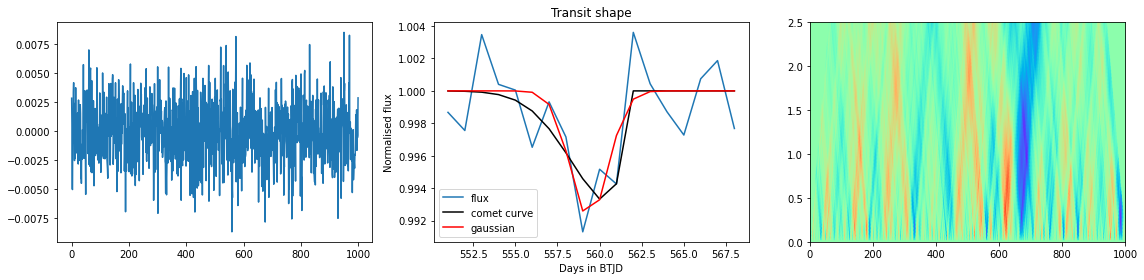

file number 2
Asymmetry score:  1.0002


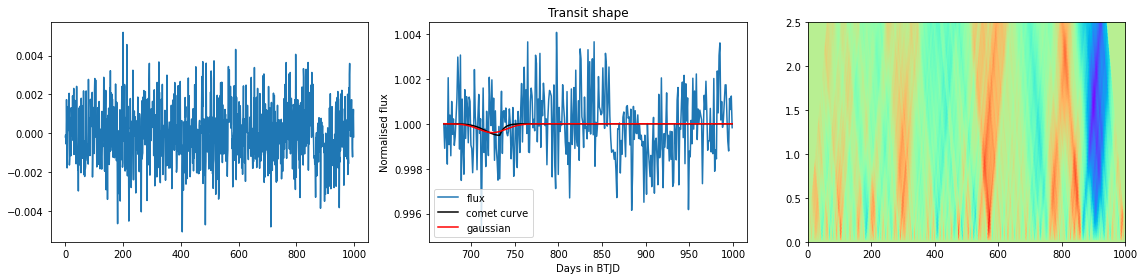

file number 96
Asymmetry score:  0.9998


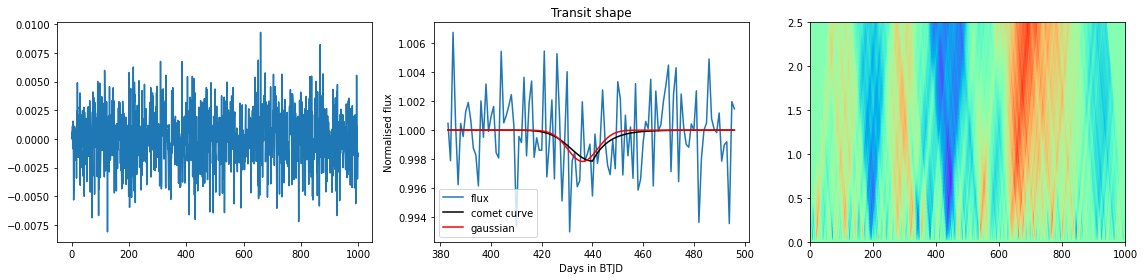

file number 25
Asymmetry score:  0.9964


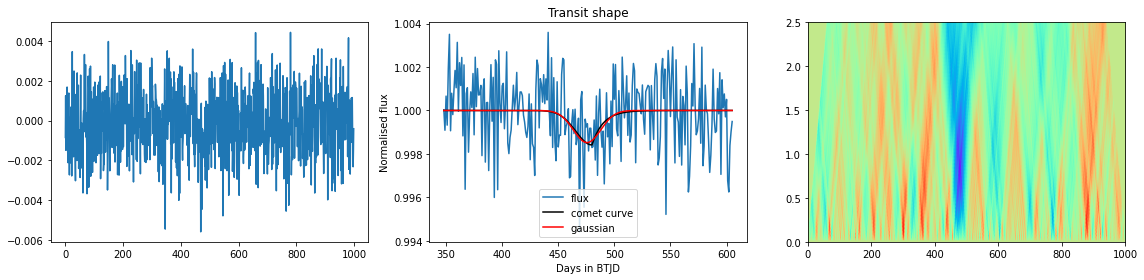

file number 44
Asymmetry score:  1.4903


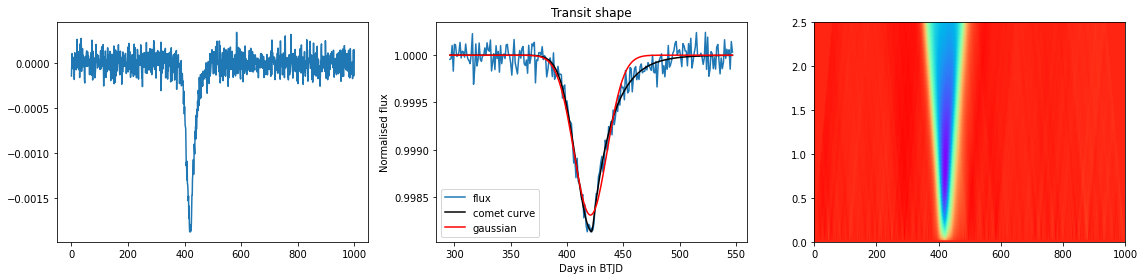

file number 92
Asymmetry score:  0.9863


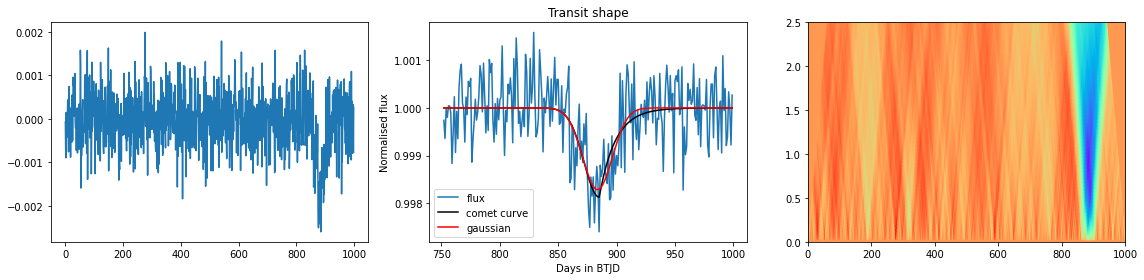

file number 63
Asymmetry score:  1.0394


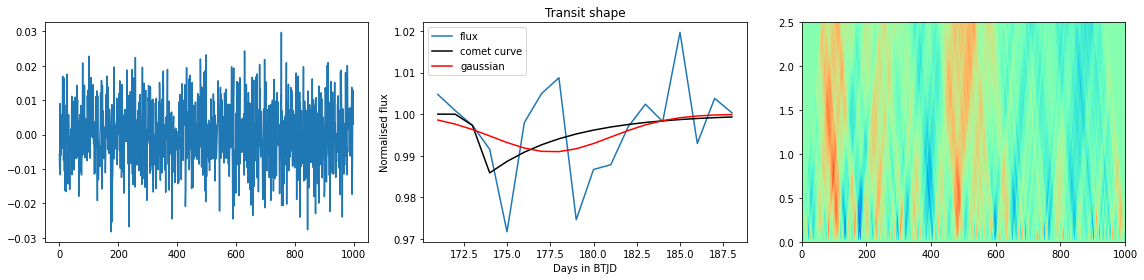

file number 95
Asymmetry score:  1.0042


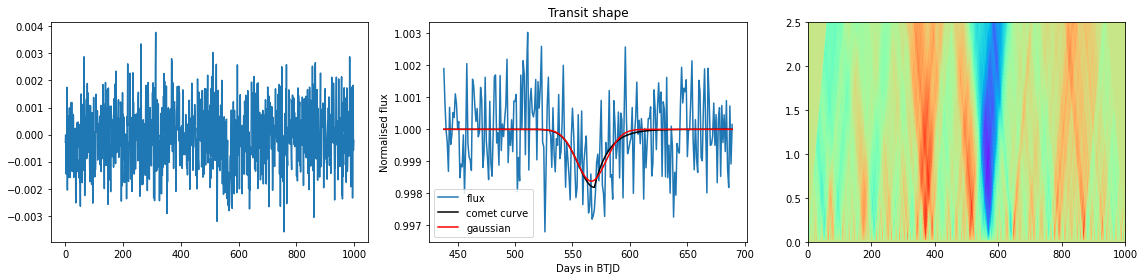

file number 90
error: attempt to get argmax of an empty sequence. moving to next one...
file number 28
Asymmetry score:  1.086


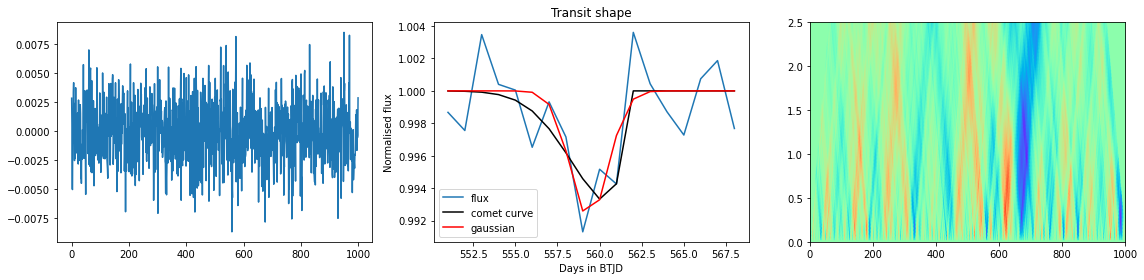

file number 99
Asymmetry score:  1.0385


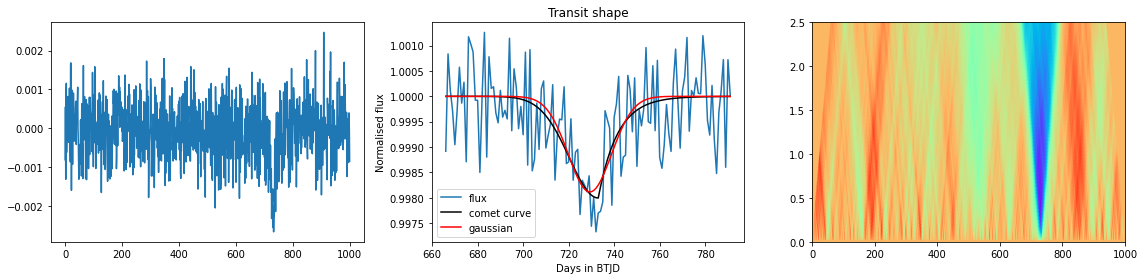

file number 23
Asymmetry score:  1.0113


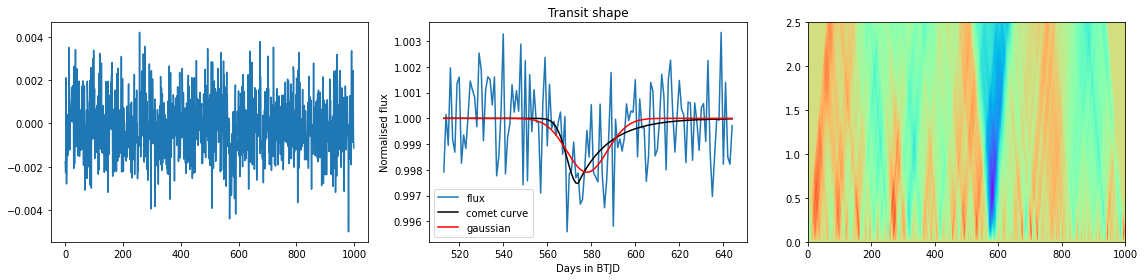

file number 88
Asymmetry score:  1.0976


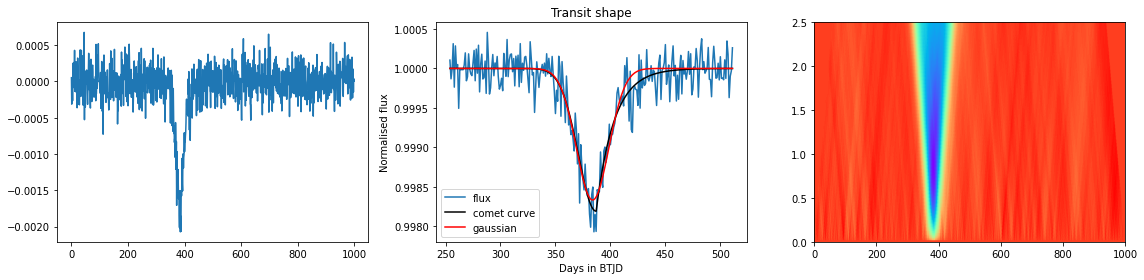

file number 32
Asymmetry score:  0.9993


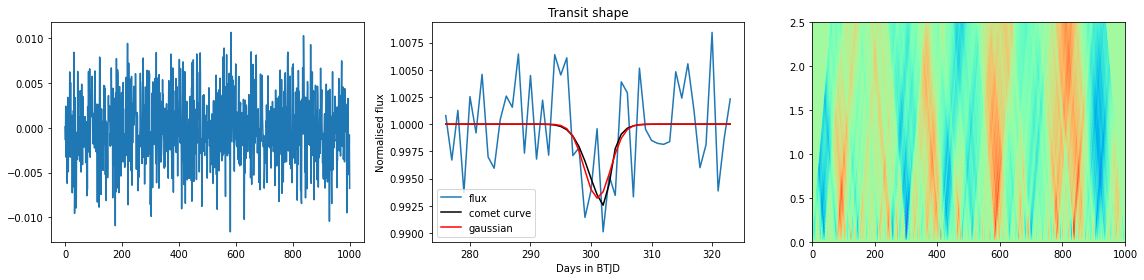

file number 75
Asymmetry score:  1.0367


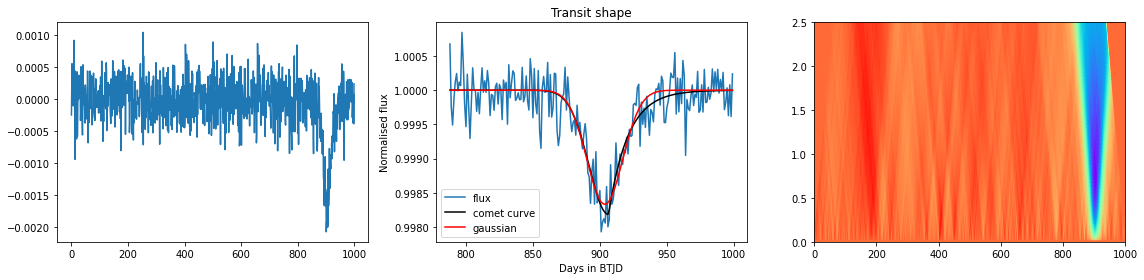

file number 14
Asymmetry score:  1.0087


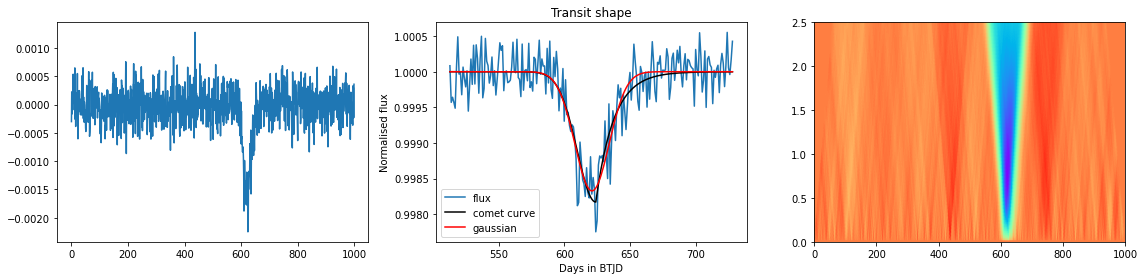

file number 81
Asymmetry score:  1.0004


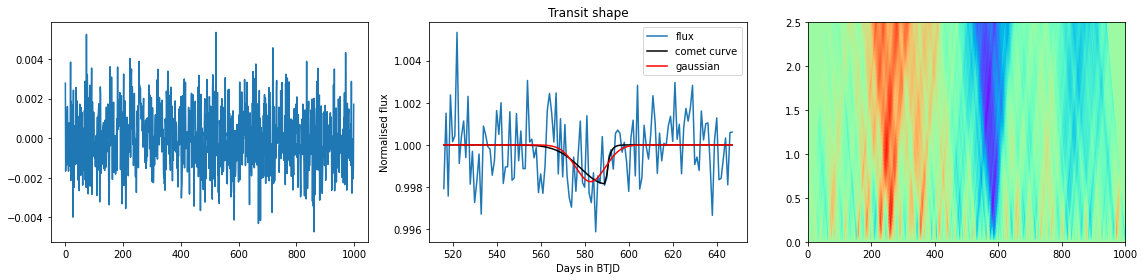

file number 89
Asymmetry score:  0.9985


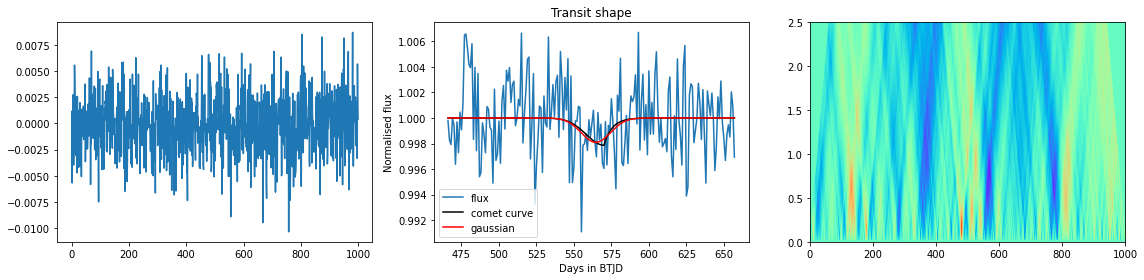

file number 13
Asymmetry score:  1.007


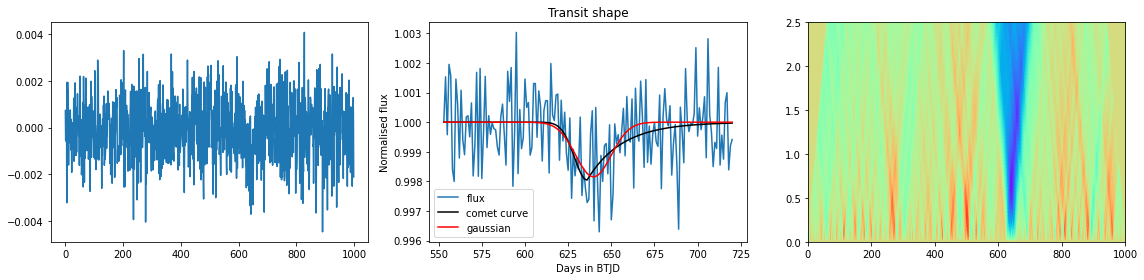

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [25]:
with open('injected_transits.txt', 'a') as output:
    for i in (range(0,50)):
        try:
            rand = np.random.choice(np.arange(0,100,1)).astype('U32')
            test= np.load(f'injection_testing/for_testing/faketransit_{rand}.npz')
            print("file number", rand)
        except FileNotFoundError:
            continue
        table = Table([test['time'],test['flux'],test['quality']],names=test.files)
        t = table['time']
        flux = table['flux']
        quality = table['quality']
        timestep = calculate_timestep(table)
        factor = (1/48)/timestep
        T = test_statistic_array(table['flux'].value,60)
        Ts = nonzero(T).std()
        #plt.figure(figsize=(10,4))
        #plt.imshow(T,origin='bottom',extent=(0,1000) + (0, 2.5),aspect="auto",cmap="rainbow")
        plt.show()
        m, n = np.unravel_index(
            T.argmin(), T.shape
            )  # T.argmin(): location of  T.shape: 2D array with x,y points in that dimension
        minT = T[m, n]
        minT_time = t[n]
        minT_duration = m
        Tm_start = n-math.floor((m-1)/2)
        Tm_end = Tm_start + m
        Tm_depth = flux[Tm_start:Tm_end].mean() 
        snr = round(minT / Ts, 1)
        try:
            t2 = t[n - 3 * m : n + 3 * m]
            x2 = flux[n - 3 * m : n + 3 * m]
            q2 = quality[
            n - 3 * m : n + 3 * m
            ]  # quality points from three transit widths to other edge of three transit widths.
            background = (sum(x2[: 1 * m]) + sum(x2[5 * m :])) / (2 * m)
            x2 -= background
            paramsgauss = single_gaussian_curve_fit(t2, -x2)
            y2 = -gauss(t2, *paramsgauss)
            paramscomet = comet_curve_fit(t2, -x2)
            w2 = -comet_curve(t2, *paramscomet)
            scores = [score_fit(x2, fit) for fit in [y2, w2]]
            print("Asymmetry score: ", round(scores[0] / scores[1], 4))

        except:
            print("error: attempt to get argmax of an empty sequence. moving to next one...")
            continue
        fig2, (ax,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
        try:
            ax.plot(t,flux)
            ax2.plot(t2, x2 + 1, label="flux")
            ax2.plot(t2, w2 + 1, label="comet curve", color="k")
            ax2.plot(t2, y2 + 1, label="gaussian", color="r")
            ax2.legend()
            ax2.set_title("Transit shape")
            ax2.set_xlabel("Days in BTJD")
            ax2.set_ylabel("Normalised flux")
            ax3.imshow(T,origin='bottom',extent=(0,1000) + (0, 2.5),aspect="auto",cmap="rainbow")
            plt.tight_layout()
            plt.show()
        except:
            continue
    output.write(rand + (scores[0] / scores[1]) + " " + snr + "\n")

In [ ]:
hdul = fits.open('betapic/test/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits')
hdul[1].data

In [ ]:
hdul[1].data['TIME']

In [ ]:
table = Table(hdul[1].data)['TIME','PDCSAP_FLUX','QUALITY']
table

In [ ]:
np.nanmedian(np.diff(table['TIME']))

In [ ]:
calculate_timestep(table)